In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [11]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [30]:
# Convert categorical data to numeric and separate target feature for training data
# Convert categorical data to numeric and separate target feature for testing data

# drop loan status column
drop_train = train_df.drop('loan_status', axis  = 1)
drop_test = test_df.drop('loan_status', axis  = 1)
target_feature_train = train_df['loan_status']
target_feature_test = test_df['loan_status']

# create one-hot encoding of data frames
train_dum = pd.get_dummies(drop_train)
test_dum = pd.get_dummies(drop_test)

train_labels = LabelEncoder().fit_transform(target_feature_train)
test_labels = LabelEncoder().fit_transform(target_feature_test)



# check number of columns and add missing one to test data

for col in train_dum.columns:
    if col not in test_dum.columns:
        missing_col = col
print("Missing Feature is : " + missing_col)

# put missing feature into test set and in the same index as found in training set
column_num_missing_feature  = list(train_dum.columns).index(missing_col)
init_missing_feature = [0 for x in range(test_dum.shape[0])]
test_dum.insert(column_num_missing_feature, missing_col, init_missing_feature)

test_dum.head()

Missing Feature is : debt_settlement_flag_Y


,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,0,1,0,1,1,0,1,0,1,0
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,0,1,0,1,1,0,1,0,1,0
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,0,1,0,1,1,0,1,0,1,0
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,0,1,0,1,1,0,1,0,1,0
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,0,1,0,1,1,0,1,0,1,0


# Prediction
Logistic regression will be the better model as we have either low risk or high risk loans. Since the classification of interest is strictly binary, logistic regression seems like a much better choice. Logistic regression is also based on explantatory and response variables in an explicit mathematical model. In our case the response variable is loan risk and the explanatory variables are the features found in our data sets. This follows a more tailored approach, therefore will likely perform better. A random forest classifier on the other hand accounts for many classifications and might create unnesscary noise within our classification goal. Upon doing some extra reading, random forest do not fare well in situations with a very high amount of features and may run the risk of overfitting. 


In [40]:
# Train the Logistic Regression model on the unscaled data and print the model score
Cs = [1.0,3.0,5.0,7.0,9.0]
maxs = [100,750,1000,10000,15000]
params = [[Cs[i],maxs[i]] for i in range(len(maxs))]

i = 1
trains = []
tests = []
for c in Cs:
    for mx in maxs:
        LR = LogisticRegression(C=c, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=mx,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)
        LR.fit(train_dum,train_labels)
        print("_______________________")
        print("iteration " + str(i))
        print(f"training score : {LR.score(train_dum,train_labels)}")
        print(f"testing score : {LR.score(test_dum,test_labels)}|reguralization: {c} , max iterations{mx}")
        trains.append(LR.score(train_dum,train_labels))
        tests.append(LR.score(test_dum,test_labels))
        i = i+1

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 1
training score : 0.648440065681445
testing score : 0.5253083794130158|reguralization: 1.0 , max iterations100


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 2
training score : 0.6856321839080459
testing score : 0.5655040408336878|reguralization: 1.0 , max iterations750


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 3
training score : 0.6811986863711001
testing score : 0.5542322415993194|reguralization: 1.0 , max iterations1000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 4
training score : 0.702216748768473
testing score : 0.5642279880901744|reguralization: 1.0 , max iterations10000
_______________________
iteration 5
training score : 0.7016420361247947
testing score : 0.5621012335176521|reguralization: 1.0 , max iterations15000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 6
training score : 0.648440065681445
testing score : 0.5248830284985113|reguralization: 3.0 , max iterations100


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 7
training score : 0.6852216748768473
testing score : 0.5623139089749043|reguralization: 3.0 , max iterations750


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 8
training score : 0.6785714285714286
testing score : 0.5535942152275627|reguralization: 3.0 , max iterations1000
_______________________
iteration 9
training score : 0.6989326765188835
testing score : 0.56571671629094|reguralization: 3.0 , max iterations10000
_______________________
iteration 10
training score : 0.6989326765188835
testing score : 0.56571671629094|reguralization: 3.0 , max iterations15000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 11
training score : 0.6483579638752053
testing score : 0.5248830284985113|reguralization: 5.0 , max iterations100


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 12
training score : 0.6827586206896552
testing score : 0.5563589961718418|reguralization: 5.0 , max iterations750


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 13
training score : 0.6807060755336617
testing score : 0.5544449170565716|reguralization: 5.0 , max iterations1000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 14
training score : 0.7000821018062398
testing score : 0.5676307954062101|reguralization: 5.0 , max iterations10000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 15
training score : 0.7044334975369458
testing score : 0.5716716290940026|reguralization: 5.0 , max iterations15000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 16
training score : 0.6483579638752053
testing score : 0.5248830284985113|reguralization: 7.0 , max iterations100


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 17
training score : 0.6885878489326765
testing score : 0.5716716290940026|reguralization: 7.0 , max iterations750


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 18
training score : 0.7027914614121511
testing score : 0.5825180774138664|reguralization: 7.0 , max iterations1000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 19
training score : 0.7002463054187192
testing score : 0.5669927690344534|reguralization: 7.0 , max iterations10000
_______________________
iteration 20
training score : 0.7006568144499179
testing score : 0.5661420672054445|reguralization: 7.0 , max iterations15000


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 21
training score : 0.6483579638752053
testing score : 0.5248830284985113|reguralization: 9.0 , max iterations100


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 22
training score : 0.6795566502463054
testing score : 0.5542322415993194|reguralization: 9.0 , max iterations750


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration 23
training score : 0.6786535303776683
testing score : 0.5523181624840493|reguralization: 9.0 , max iterations1000
_______________________
iteration 24
training score : 0.6999178981937603
testing score : 0.5712462781794981|reguralization: 9.0 , max iterations10000
_______________________
iteration 25
training score : 0.6999178981937603
testing score : 0.5712462781794981|reguralization: 9.0 , max iterations15000


Training Data Max Score and Iteration Number: 
0.7044334975369458 15
Testing Data Max Score and Iteration Number: 
0.5825180774138664 18


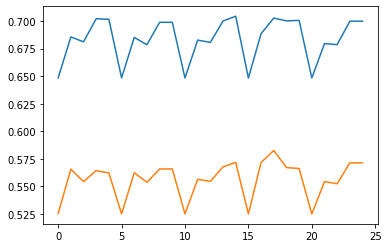

In [41]:
x_vals = [x for x in range(len(trains))]
plt.plot(x_vals,trains)
plt.plot(x_vals,tests)
print("Training Data Max Score and Iteration Number: ")
print(max(trains),trains.index(max(trains))+1) 
print("Testing Data Max Score and Iteration Number: ")
print(max(tests),tests.index(max(tests))+1) 

In [32]:
# Train a Random Forest Classifier model and print the model score
num_est = [x for x in range(1,20)]
criteria = ["gini","entropy"]

j = 1
trains_rf = []
tests_rf = []
for n in num_est:
    for c in criteria:
        RF = RandomForestClassifier(n_estimators = n, criterion = c)
        RF.fit(train_dum,train_labels)
        print("-------------------")
        print(f"iteration number: {j}")
        print(f"training score : {RF.score(train_dum,train_labels)}")
        print(f"testing score : {RF.score(test_dum,test_labels)}")
        print(f"number of estimators: {n}, criteria: {c} ")
        trains_rf.append(RF.score(train_dum,train_labels))
        tests_rf.append(RF.score(test_dum,test_labels))
        j = j+1 

-------------------
iteration number: 1
training score : 0.8813628899835796
testing score : 0.5610378562313909
number of estimators: 1, criteria: gini 
-------------------
iteration number: 2
training score : 0.8789819376026272
testing score : 0.5961293066780093
number of estimators: 1, criteria: entropy 
-------------------
iteration number: 3
training score : 0.8744663382594418
testing score : 0.5472139515099957
number of estimators: 2, criteria: gini 
-------------------
iteration number: 4
training score : 0.8871921182266009
testing score : 0.6233517652062952
number of estimators: 2, criteria: entropy 
-------------------
iteration number: 5
training score : 0.9464696223316913
testing score : 0.5663547426626967
number of estimators: 3, criteria: gini 
-------------------
iteration number: 6
training score : 0.948768472906404
testing score : 0.5903870693321991
number of estimators: 3, criteria: entropy 
-------------------
iteration number: 7
training score : 0.948768472906404
testi

Training Data Max Score and Iteration Number: 
0.9986863711001642 37
Testing Data Max Score and Iteration Number: 
0.6767333049766057 34


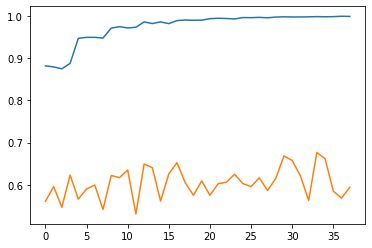

In [38]:
x_vals = [x for x in range(len(trains_rf))]
plt.plot(x_vals,trains_rf)
plt.plot(x_vals,tests_rf)
print("Training Data Max Score and Iteration Number: ")
print(max(trains_rf),trains_rf.index(max(trains_rf))+1) 
print("Testing Data Max Score and Iteration Number: ")
print(max(tests_rf),tests_rf.index(max(tests_rf))+1) 

# Prediction for Scaling Results
Upon examining the data sets, it is clear that there are many features with large numbers and other features with seemingly small numbers. Scaling will likely create a more balanced data set and result in better performance by the models. This will reduce the possibilty of certain features' magnitudes being favored in model training. Especially since we have a large number features and an extensive data set, we want to eliminate any chance of dealing with larger values that may skew our results. In our situation, this will likely improve our results. 


In [42]:
# Scale the data
scale_train = StandardScaler().fit(train_dum)
X_train_scaled = scale_train.transform(train_dum)
X_test_scaled = scale_train.transform(test_dum)

In [43]:

# Train the Logistic Regression model on the scaled data and print the model score
Cs = [x for x in range(1,51,5)]
maxs = [float(x) for x in range(1,25001,2500)]

i = 1
trains = []
tests = []
for c in Cs:
    for mx in maxs:
        LR = LogisticRegression(C=c, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=mx,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)
        LR.fit(X_train_scaled,train_labels)
        print("_______________________")
        print("iteration" + str(i))
        print(f"training score : {LR.score(X_train_scaled,train_labels)}")
        print(f"testing score : {LR.score(X_test_scaled,test_labels)}")
        print(f"reguralization: {c} , max iterations {mx}")
        trains.append(LR.score(X_train_scaled,train_labels))
        tests.append(LR.score(X_test_scaled,test_labels))
        i = i+1

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration1
training score : 0.6425287356321839
testing score : 0.5669927690344534
reguralization: 1 , max iterations 0.0
_______________________
iteration2
training score : 0.7127257799671592
testing score : 0.7201190982560612
reguralization: 1 , max iterations 1000.0
_______________________
iteration3
training score : 0.7127257799671592
testing score : 0.7201190982560612
reguralization: 1 , max iterations 2000.0
_______________________
iteration4
training score : 0.7127257799671592
testing score : 0.7201190982560612
reguralization: 1 , max iterations 3000.0
_______________________
iteration5
training score : 0.7127257799671592
testing score : 0.7201190982560612
reguralization: 1 , max iterations 4000.0
_______________________
iteration6
training score : 0.7127257799671592
testing score : 0.7201190982560612
reguralization: 1 , max iterations 5000.0
_______________________
iteration7
training score : 0.7127257799671592
testing score : 0.7201190982560612
reguraliz

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration27
training score : 0.7138752052545156
testing score : 0.7141641854529988
reguralization: 3 , max iterations 1000.0
_______________________
iteration28
training score : 0.7138752052545156
testing score : 0.7141641854529988
reguralization: 3 , max iterations 2000.0
_______________________
iteration29
training score : 0.7138752052545156
testing score : 0.7141641854529988
reguralization: 3 , max iterations 3000.0
_______________________
iteration30
training score : 0.7138752052545156
testing score : 0.7141641854529988
reguralization: 3 , max iterations 4000.0
_______________________
iteration31
training score : 0.7138752052545156
testing score : 0.7141641854529988
reguralization: 3 , max iterations 5000.0
_______________________
iteration32
training score : 0.7138752052545156
testing score : 0.7141641854529988
reguralization: 3 , max iterations 6000.0
_______________________
iteration33
training score : 0.7138752052545156
testing score : 0.7141641854529988

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration52
training score : 0.7140394088669951
testing score : 0.7135261590812421
reguralization: 5 , max iterations 1000.0
_______________________
iteration53
training score : 0.7140394088669951
testing score : 0.7135261590812421
reguralization: 5 , max iterations 2000.0
_______________________
iteration54
training score : 0.7140394088669951
testing score : 0.7135261590812421
reguralization: 5 , max iterations 3000.0
_______________________
iteration55
training score : 0.7140394088669951
testing score : 0.7135261590812421
reguralization: 5 , max iterations 4000.0
_______________________
iteration56
training score : 0.7140394088669951
testing score : 0.7135261590812421
reguralization: 5 , max iterations 5000.0
_______________________
iteration57
training score : 0.7140394088669951
testing score : 0.7135261590812421
reguralization: 5 , max iterations 6000.0
_______________________
iteration58
training score : 0.7140394088669951
testing score : 0.7135261590812421

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration77
training score : 0.7136288998357964
testing score : 0.7105487026797107
reguralization: 7 , max iterations 1000.0
_______________________
iteration78
training score : 0.7136288998357964
testing score : 0.7105487026797107
reguralization: 7 , max iterations 2000.0
_______________________
iteration79
training score : 0.7136288998357964
testing score : 0.7105487026797107
reguralization: 7 , max iterations 3000.0
_______________________
iteration80
training score : 0.7136288998357964
testing score : 0.7105487026797107
reguralization: 7 , max iterations 4000.0
_______________________
iteration81
training score : 0.7136288998357964
testing score : 0.7105487026797107
reguralization: 7 , max iterations 5000.0
_______________________
iteration82
training score : 0.7136288998357964
testing score : 0.7105487026797107
reguralization: 7 , max iterations 6000.0
_______________________
iteration83
training score : 0.7136288998357964
testing score : 0.7105487026797107

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration102
training score : 0.7136288998357964
testing score : 0.6926839642705231
reguralization: 9 , max iterations 1000.0
_______________________
iteration103
training score : 0.7136288998357964
testing score : 0.6926839642705231
reguralization: 9 , max iterations 2000.0
_______________________
iteration104
training score : 0.7136288998357964
testing score : 0.6926839642705231
reguralization: 9 , max iterations 3000.0
_______________________
iteration105
training score : 0.7136288998357964
testing score : 0.6926839642705231
reguralization: 9 , max iterations 4000.0
_______________________
iteration106
training score : 0.7136288998357964
testing score : 0.6926839642705231
reguralization: 9 , max iterations 5000.0
_______________________
iteration107
training score : 0.7136288998357964
testing score : 0.6926839642705231
reguralization: 9 , max iterations 6000.0
_______________________
iteration108
training score : 0.7136288998357964
testing score : 0.692683964

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration127
training score : 0.7134646962233169
testing score : 0.688855806039983
reguralization: 11 , max iterations 1000.0
_______________________
iteration128
training score : 0.7134646962233169
testing score : 0.688855806039983
reguralization: 11 , max iterations 2000.0
_______________________
iteration129
training score : 0.7134646962233169
testing score : 0.688855806039983
reguralization: 11 , max iterations 3000.0
_______________________
iteration130
training score : 0.7134646962233169
testing score : 0.688855806039983
reguralization: 11 , max iterations 4000.0
_______________________
iteration131
training score : 0.7134646962233169
testing score : 0.688855806039983
reguralization: 11 , max iterations 5000.0
_______________________
iteration132
training score : 0.7134646962233169
testing score : 0.688855806039983
reguralization: 11 , max iterations 6000.0
_______________________
iteration133
training score : 0.7134646962233169
testing score : 0.688855806

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration152
training score : 0.7135467980295567
testing score : 0.6843896214376861
reguralization: 13 , max iterations 1000.0
_______________________
iteration153
training score : 0.7135467980295567
testing score : 0.6843896214376861
reguralization: 13 , max iterations 2000.0
_______________________
iteration154
training score : 0.7135467980295567
testing score : 0.6843896214376861
reguralization: 13 , max iterations 3000.0
_______________________
iteration155
training score : 0.7135467980295567
testing score : 0.6843896214376861
reguralization: 13 , max iterations 4000.0
_______________________
iteration156
training score : 0.7135467980295567
testing score : 0.6843896214376861
reguralization: 13 , max iterations 5000.0
_______________________
iteration157
training score : 0.7135467980295567
testing score : 0.6843896214376861
reguralization: 13 , max iterations 6000.0
_______________________
iteration158
training score : 0.7135467980295567
testing score : 0.684

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration177
training score : 0.7134646962233169
testing score : 0.6867290514674607
reguralization: 15 , max iterations 1000.0
_______________________
iteration178
training score : 0.7134646962233169
testing score : 0.6867290514674607
reguralization: 15 , max iterations 2000.0
_______________________
iteration179
training score : 0.7134646962233169
testing score : 0.6867290514674607
reguralization: 15 , max iterations 3000.0
_______________________
iteration180
training score : 0.7134646962233169
testing score : 0.6867290514674607
reguralization: 15 , max iterations 4000.0
_______________________
iteration181
training score : 0.7134646962233169
testing score : 0.6867290514674607
reguralization: 15 , max iterations 5000.0
_______________________
iteration182
training score : 0.7134646962233169
testing score : 0.6867290514674607
reguralization: 15 , max iterations 6000.0
_______________________
iteration183
training score : 0.7134646962233169
testing score : 0.686

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration202
training score : 0.7136288998357964
testing score : 0.688005104210974
reguralization: 17 , max iterations 1000.0
_______________________
iteration203
training score : 0.7136288998357964
testing score : 0.688005104210974
reguralization: 17 , max iterations 2000.0
_______________________
iteration204
training score : 0.7136288998357964
testing score : 0.688005104210974
reguralization: 17 , max iterations 3000.0
_______________________
iteration205
training score : 0.7136288998357964
testing score : 0.688005104210974
reguralization: 17 , max iterations 4000.0
_______________________
iteration206
training score : 0.7136288998357964
testing score : 0.688005104210974
reguralization: 17 , max iterations 5000.0
_______________________
iteration207
training score : 0.7136288998357964
testing score : 0.688005104210974
reguralization: 17 , max iterations 6000.0
_______________________
iteration208
training score : 0.7136288998357964
testing score : 0.688005104

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration227
training score : 0.7136288998357964
testing score : 0.663334751169715
reguralization: 19 , max iterations 1000.0
_______________________
iteration228
training score : 0.7136288998357964
testing score : 0.663334751169715
reguralization: 19 , max iterations 2000.0
_______________________
iteration229
training score : 0.7136288998357964
testing score : 0.663334751169715
reguralization: 19 , max iterations 3000.0
_______________________
iteration230
training score : 0.7136288998357964
testing score : 0.663334751169715
reguralization: 19 , max iterations 4000.0
_______________________
iteration231
training score : 0.7136288998357964
testing score : 0.663334751169715
reguralization: 19 , max iterations 5000.0
_______________________
iteration232
training score : 0.7136288998357964
testing score : 0.663334751169715
reguralization: 19 , max iterations 6000.0
_______________________
iteration233
training score : 0.7136288998357964
testing score : 0.663334751

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration252
training score : 0.7133825944170772
testing score : 0.676095278604849
reguralization: 21 , max iterations 1000.0
_______________________
iteration253
training score : 0.7133825944170772
testing score : 0.676095278604849
reguralization: 21 , max iterations 2000.0
_______________________
iteration254
training score : 0.7133825944170772
testing score : 0.676095278604849
reguralization: 21 , max iterations 3000.0
_______________________
iteration255
training score : 0.7133825944170772
testing score : 0.676095278604849
reguralization: 21 , max iterations 4000.0
_______________________
iteration256
training score : 0.7133825944170772
testing score : 0.676095278604849
reguralization: 21 , max iterations 5000.0
_______________________
iteration257
training score : 0.7133825944170772
testing score : 0.676095278604849
reguralization: 21 , max iterations 6000.0
_______________________
iteration258
training score : 0.7133825944170772
testing score : 0.676095278

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration277
training score : 0.7133004926108374
testing score : 0.6584432156529136
reguralization: 23 , max iterations 1000.0
_______________________
iteration278
training score : 0.7133004926108374
testing score : 0.6584432156529136
reguralization: 23 , max iterations 2000.0
_______________________
iteration279
training score : 0.7133004926108374
testing score : 0.6584432156529136
reguralization: 23 , max iterations 3000.0
_______________________
iteration280
training score : 0.7133004926108374
testing score : 0.6584432156529136
reguralization: 23 , max iterations 4000.0
_______________________
iteration281
training score : 0.7133004926108374
testing score : 0.6584432156529136
reguralization: 23 , max iterations 5000.0
_______________________
iteration282
training score : 0.7133004926108374
testing score : 0.6584432156529136
reguralization: 23 , max iterations 6000.0
_______________________
iteration283
training score : 0.7133004926108374
testing score : 0.658

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration302
training score : 0.7134646962233169
testing score : 0.6618460229689493
reguralization: 25 , max iterations 1000.0
_______________________
iteration303
training score : 0.7134646962233169
testing score : 0.6618460229689493
reguralization: 25 , max iterations 2000.0
_______________________
iteration304
training score : 0.7134646962233169
testing score : 0.6618460229689493
reguralization: 25 , max iterations 3000.0
_______________________
iteration305
training score : 0.7134646962233169
testing score : 0.6618460229689493
reguralization: 25 , max iterations 4000.0
_______________________
iteration306
training score : 0.7134646962233169
testing score : 0.6618460229689493
reguralization: 25 , max iterations 5000.0
_______________________
iteration307
training score : 0.7134646962233169
testing score : 0.6618460229689493
reguralization: 25 , max iterations 6000.0
_______________________
iteration308
training score : 0.7134646962233169
testing score : 0.661

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration327
training score : 0.7133825944170772
testing score : 0.6484474691620588
reguralization: 27 , max iterations 1000.0
_______________________
iteration328
training score : 0.7133825944170772
testing score : 0.6484474691620588
reguralization: 27 , max iterations 2000.0
_______________________
iteration329
training score : 0.7133825944170772
testing score : 0.6484474691620588
reguralization: 27 , max iterations 3000.0
_______________________
iteration330
training score : 0.7133825944170772
testing score : 0.6484474691620588
reguralization: 27 , max iterations 4000.0
_______________________
iteration331
training score : 0.7133825944170772
testing score : 0.6484474691620588
reguralization: 27 , max iterations 5000.0
_______________________
iteration332
training score : 0.7133825944170772
testing score : 0.6484474691620588
reguralization: 27 , max iterations 6000.0
_______________________
iteration333
training score : 0.7133825944170772
testing score : 0.648

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration352
training score : 0.7134646962233169
testing score : 0.709910676307954
reguralization: 29 , max iterations 1000.0
_______________________
iteration353
training score : 0.7134646962233169
testing score : 0.709910676307954
reguralization: 29 , max iterations 2000.0
_______________________
iteration354
training score : 0.7134646962233169
testing score : 0.709910676307954
reguralization: 29 , max iterations 3000.0
_______________________
iteration355
training score : 0.7134646962233169
testing score : 0.709910676307954
reguralization: 29 , max iterations 4000.0
_______________________
iteration356
training score : 0.7134646962233169
testing score : 0.709910676307954
reguralization: 29 , max iterations 5000.0
_______________________
iteration357
training score : 0.7134646962233169
testing score : 0.709910676307954
reguralization: 29 , max iterations 6000.0
_______________________
iteration358
training score : 0.7134646962233169
testing score : 0.709910676

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration377
training score : 0.7137931034482758
testing score : 0.6333475116971502
reguralization: 31 , max iterations 1000.0
_______________________
iteration378
training score : 0.7137931034482758
testing score : 0.6333475116971502
reguralization: 31 , max iterations 2000.0
_______________________
iteration379
training score : 0.7137931034482758
testing score : 0.6333475116971502
reguralization: 31 , max iterations 3000.0
_______________________
iteration380
training score : 0.7137931034482758
testing score : 0.6333475116971502
reguralization: 31 , max iterations 4000.0
_______________________
iteration381
training score : 0.7137931034482758
testing score : 0.6333475116971502
reguralization: 31 , max iterations 5000.0
_______________________
iteration382
training score : 0.7137931034482758
testing score : 0.6333475116971502
reguralization: 31 , max iterations 6000.0
_______________________
iteration383
training score : 0.7137931034482758
testing score : 0.633

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration402
training score : 0.7136288998357964
testing score : 0.6339855380689069
reguralization: 33 , max iterations 1000.0
_______________________
iteration403
training score : 0.7136288998357964
testing score : 0.6339855380689069
reguralization: 33 , max iterations 2000.0
_______________________
iteration404
training score : 0.7136288998357964
testing score : 0.6339855380689069
reguralization: 33 , max iterations 3000.0
_______________________
iteration405
training score : 0.7136288998357964
testing score : 0.6339855380689069
reguralization: 33 , max iterations 4000.0
_______________________
iteration406
training score : 0.7136288998357964
testing score : 0.6339855380689069
reguralization: 33 , max iterations 5000.0
_______________________
iteration407
training score : 0.7136288998357964
testing score : 0.6339855380689069
reguralization: 33 , max iterations 6000.0
_______________________
iteration408
training score : 0.7136288998357964
testing score : 0.633

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration427
training score : 0.7134646962233169
testing score : 0.6550404083368779
reguralization: 35 , max iterations 1000.0
_______________________
iteration428
training score : 0.7134646962233169
testing score : 0.6550404083368779
reguralization: 35 , max iterations 2000.0
_______________________
iteration429
training score : 0.7134646962233169
testing score : 0.6550404083368779
reguralization: 35 , max iterations 3000.0
_______________________
iteration430
training score : 0.7134646962233169
testing score : 0.6550404083368779
reguralization: 35 , max iterations 4000.0
_______________________
iteration431
training score : 0.7134646962233169
testing score : 0.6550404083368779
reguralization: 35 , max iterations 5000.0
_______________________
iteration432
training score : 0.7134646962233169
testing score : 0.6550404083368779
reguralization: 35 , max iterations 6000.0
_______________________
iteration433
training score : 0.7134646962233169
testing score : 0.655

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration452
training score : 0.7133004926108374
testing score : 0.6461080391322841
reguralization: 37 , max iterations 1000.0
_______________________
iteration453
training score : 0.7133004926108374
testing score : 0.6461080391322841
reguralization: 37 , max iterations 2000.0
_______________________
iteration454
training score : 0.7133004926108374
testing score : 0.6461080391322841
reguralization: 37 , max iterations 3000.0
_______________________
iteration455
training score : 0.7133004926108374
testing score : 0.6461080391322841
reguralization: 37 , max iterations 4000.0
_______________________
iteration456
training score : 0.7133004926108374
testing score : 0.6461080391322841
reguralization: 37 , max iterations 5000.0
_______________________
iteration457
training score : 0.7133004926108374
testing score : 0.6461080391322841
reguralization: 37 , max iterations 6000.0
_______________________
iteration458
training score : 0.7133004926108374
testing score : 0.646

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration477
training score : 0.7135467980295567
testing score : 0.6348362398979158
reguralization: 39 , max iterations 1000.0
_______________________
iteration478
training score : 0.7135467980295567
testing score : 0.6348362398979158
reguralization: 39 , max iterations 2000.0
_______________________
iteration479
training score : 0.7135467980295567
testing score : 0.6348362398979158
reguralization: 39 , max iterations 3000.0
_______________________
iteration480
training score : 0.7135467980295567
testing score : 0.6348362398979158
reguralization: 39 , max iterations 4000.0
_______________________
iteration481
training score : 0.7135467980295567
testing score : 0.6348362398979158
reguralization: 39 , max iterations 5000.0
_______________________
iteration482
training score : 0.7135467980295567
testing score : 0.6348362398979158
reguralization: 39 , max iterations 6000.0
_______________________
iteration483
training score : 0.7135467980295567
testing score : 0.634

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration502
training score : 0.7136288998357964
testing score : 0.6086771586558911
reguralization: 41 , max iterations 1000.0
_______________________
iteration503
training score : 0.7136288998357964
testing score : 0.6086771586558911
reguralization: 41 , max iterations 2000.0
_______________________
iteration504
training score : 0.7136288998357964
testing score : 0.6086771586558911
reguralization: 41 , max iterations 3000.0
_______________________
iteration505
training score : 0.7136288998357964
testing score : 0.6086771586558911
reguralization: 41 , max iterations 4000.0
_______________________
iteration506
training score : 0.7136288998357964
testing score : 0.6086771586558911
reguralization: 41 , max iterations 5000.0
_______________________
iteration507
training score : 0.7136288998357964
testing score : 0.6086771586558911
reguralization: 41 , max iterations 6000.0
_______________________
iteration508
training score : 0.7136288998357964
testing score : 0.608

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration527
training score : 0.7135467980295567
testing score : 0.6303700552956188
reguralization: 43 , max iterations 1000.0
_______________________
iteration528
training score : 0.7135467980295567
testing score : 0.6303700552956188
reguralization: 43 , max iterations 2000.0
_______________________
iteration529
training score : 0.7135467980295567
testing score : 0.6303700552956188
reguralization: 43 , max iterations 3000.0
_______________________
iteration530
training score : 0.7135467980295567
testing score : 0.6303700552956188
reguralization: 43 , max iterations 4000.0
_______________________
iteration531
training score : 0.7135467980295567
testing score : 0.6303700552956188
reguralization: 43 , max iterations 5000.0
_______________________
iteration532
training score : 0.7135467980295567
testing score : 0.6303700552956188
reguralization: 43 , max iterations 6000.0
_______________________
iteration533
training score : 0.7135467980295567
testing score : 0.630

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration552
training score : 0.7135467980295567
testing score : 0.6252658443215653
reguralization: 45 , max iterations 1000.0
_______________________
iteration553
training score : 0.7135467980295567
testing score : 0.6252658443215653
reguralization: 45 , max iterations 2000.0
_______________________
iteration554
training score : 0.7135467980295567
testing score : 0.6252658443215653
reguralization: 45 , max iterations 3000.0
_______________________
iteration555
training score : 0.7135467980295567
testing score : 0.6252658443215653
reguralization: 45 , max iterations 4000.0
_______________________
iteration556
training score : 0.7135467980295567
testing score : 0.6252658443215653
reguralization: 45 , max iterations 5000.0
_______________________
iteration557
training score : 0.7135467980295567
testing score : 0.6252658443215653
reguralization: 45 , max iterations 6000.0
_______________________
iteration558
training score : 0.7135467980295567
testing score : 0.625

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration577
training score : 0.7139573070607553
testing score : 0.6088898341131433
reguralization: 47 , max iterations 1000.0
_______________________
iteration578
training score : 0.7139573070607553
testing score : 0.6088898341131433
reguralization: 47 , max iterations 2000.0
_______________________
iteration579
training score : 0.7139573070607553
testing score : 0.6088898341131433
reguralization: 47 , max iterations 3000.0
_______________________
iteration580
training score : 0.7139573070607553
testing score : 0.6088898341131433
reguralization: 47 , max iterations 4000.0
_______________________
iteration581
training score : 0.7139573070607553
testing score : 0.6088898341131433
reguralization: 47 , max iterations 5000.0
_______________________
iteration582
training score : 0.7139573070607553
testing score : 0.6088898341131433
reguralization: 47 , max iterations 6000.0
_______________________
iteration583
training score : 0.7139573070607553
testing score : 0.608

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________
iteration602
training score : 0.7133825944170772
testing score : 0.6365376435559337
reguralization: 49 , max iterations 1000.0
_______________________
iteration603
training score : 0.7133825944170772
testing score : 0.6365376435559337
reguralization: 49 , max iterations 2000.0
_______________________
iteration604
training score : 0.7133825944170772
testing score : 0.6365376435559337
reguralization: 49 , max iterations 3000.0
_______________________
iteration605
training score : 0.7133825944170772
testing score : 0.6365376435559337
reguralization: 49 , max iterations 4000.0
_______________________
iteration606
training score : 0.7133825944170772
testing score : 0.6365376435559337
reguralization: 49 , max iterations 5000.0
_______________________
iteration607
training score : 0.7133825944170772
testing score : 0.6365376435559337
reguralization: 49 , max iterations 6000.0
_______________________
iteration608
training score : 0.7133825944170772
testing score : 0.636

Training Data Max Score and Iteration Number: 
0.7140394088669951 52
Testing Data Max Score and Iteration Number: 
0.7201190982560612 2


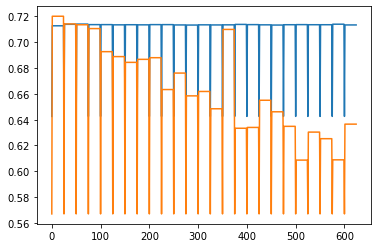

In [44]:
x_vals = [x for x in range(len(trains))]
plt.plot(x_vals,trains)
plt.plot(x_vals,tests)
print("Training Data Max Score and Iteration Number: ")
print(max(trains),trains.index(max(trains))+1) 
print("Testing Data Max Score and Iteration Number: ")
print(max(tests),tests.index(max(tests))+1) 

In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
Cs = [x for x in range(1,51,5)]
maxs = [float(x+250) for x in range(0,25000,2500)]
p_grid = {'C':Cs,"max_iter":maxs}
model = LogisticRegression()
grid_clf = GridSearchCV(model, p_grid, verbose=3)
# grid search just does a nested for loop type structure as seen in my implementations above
random_clf = RandomizedSearchCV(model,p_grid,n_iter=100,random_state=1, verbose=3)
random_clf.fit(X_train_scaled,train_labels)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] max_iter=250.0, C=1 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. max_iter=250.0, C=1, score=0.486, total=   0.4s
[CV] max_iter=250.0, C=1 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ................. max_iter=250.0, C=1, score=0.590, total=   0.4s
[CV] max_iter=250.0, C=1 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] ................. max_iter=250.0, C=1, score=0.727, total=   0.4s
[CV] max_iter=250.0, C=1 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. max_iter=250.0, C=1, score=0.737, total=   0.4s
[CV] max_iter=250.0, C=1 .............................................
[CV] ................. max_iter=250.0, C=1, score=0.710, total=   0.4s
[CV] max_iter=2750.0, C=1 ............................................
[CV] ................ max_iter=2750.0, C=1, score=0.486, total=   0.4s
[CV] max_iter=2750.0, C=1 ............................................
[CV] ................ max_iter=2750.0, C=1, score=0.590, total=   0.4s
[CV] max_iter=2750.0, C=1 ............................................
[CV] ................ max_iter=2750.0, C=1, score=0.727, total=   0.4s
[CV] max_iter=2750.0, C=1 ............................................
[CV] ................ max_iter=2750.0, C=1, score=0.737, total=   0.4s
[CV] max_iter=2750.0, C=1 ............................................
[CV] ................ max_iter=2750.0, C=1, score=0.710, total=   0.4s
[CV] max_iter=5250.0, C=1 ............................................
[CV] .

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. max_iter=250.0, C=6, score=0.486, total=   0.3s
[CV] max_iter=250.0, C=6 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. max_iter=250.0, C=6, score=0.590, total=   0.4s
[CV] max_iter=250.0, C=6 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. max_iter=250.0, C=6, score=0.727, total=   0.3s
[CV] max_iter=250.0, C=6 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. max_iter=250.0, C=6, score=0.738, total=   0.3s
[CV] max_iter=250.0, C=6 .............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................. max_iter=250.0, C=6, score=0.711, total=   0.3s
[CV] max_iter=2750.0, C=6 ............................................
[CV] ................ max_iter=2750.0, C=6, score=0.486, total=   0.5s
[CV] max_iter=2750.0, C=6 ............................................
[CV] ................ max_iter=2750.0, C=6, score=0.590, total=   0.4s
[CV] max_iter=2750.0, C=6 ............................................
[CV] ................ max_iter=2750.0, C=6, score=0.727, total=   0.4s
[CV] max_iter=2750.0, C=6 ............................................
[CV] ................ max_iter=2750.0, C=6, score=0.739, total=   0.5s
[CV] max_iter=2750.0, C=6 ............................................
[CV] ................ max_iter=2750.0, C=6, score=0.711, total=   0.4s
[CV] max_iter=5250.0, C=6 ............................................
[CV] ................ max_iter=5250.0, C=6, score=0.486, total=   0.5s
[CV] max_iter=5250.0, C=6 ............................................
[CV] .

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=11, score=0.485, total=   0.4s
[CV] max_iter=250.0, C=11 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=11, score=0.589, total=   0.4s
[CV] max_iter=250.0, C=11 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=11, score=0.727, total=   0.4s
[CV] max_iter=250.0, C=11 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=11, score=0.737, total=   0.4s
[CV] max_iter=250.0, C=11 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=11, score=0.709, total=   0.3s
[CV] max_iter=2750.0, C=11 ...........................................
[CV] ............... max_iter=2750.0, C=11, score=0.485, total=   0.9s
[CV] max_iter=2750.0, C=11 ...........................................
[CV] ............... max_iter=2750.0, C=11, score=0.589, total=   0.5s
[CV] max_iter=2750.0, C=11 ...........................................
[CV] ............... max_iter=2750.0, C=11, score=0.727, total=   0.4s
[CV] max_iter=2750.0, C=11 ...........................................
[CV] ............... max_iter=2750.0, C=11, score=0.738, total=   0.7s
[CV] max_iter=2750.0, C=11 ...........................................
[CV] ............... max_iter=2750.0, C=11, score=0.710, total=   0.6s
[CV] max_iter=5250.0, C=11 ...........................................
[CV] ............... max_iter=5250.0, C=11, score=0.485, total=   0.8s
[CV] max_iter=5250.0, C=11 ...........................................
[CV] .

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=16, score=0.486, total=   0.4s
[CV] max_iter=250.0, C=16 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=16, score=0.589, total=   0.4s
[CV] max_iter=250.0, C=16 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=16, score=0.727, total=   0.5s
[CV] max_iter=250.0, C=16 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=16, score=0.737, total=   0.4s
[CV] max_iter=250.0, C=16 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=16, score=0.709, total=   0.5s
[CV] max_iter=2750.0, C=16 ...........................................
[CV] ............... max_iter=2750.0, C=16, score=0.486, total=   1.2s
[CV] max_iter=2750.0, C=16 ...........................................
[CV] ............... max_iter=2750.0, C=16, score=0.589, total=   1.2s
[CV] max_iter=2750.0, C=16 ...........................................
[CV] ............... max_iter=2750.0, C=16, score=0.728, total=   0.6s
[CV] max_iter=2750.0, C=16 ...........................................
[CV] ............... max_iter=2750.0, C=16, score=0.738, total=   0.8s
[CV] max_iter=2750.0, C=16 ...........................................
[CV] ............... max_iter=2750.0, C=16, score=0.710, total=   0.7s
[CV] max_iter=5250.0, C=16 ...........................................
[CV] ............... max_iter=5250.0, C=16, score=0.486, total=   2.1s
[CV] max_iter=5250.0, C=16 ...........................................
[CV] .

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=21, score=0.486, total=   0.5s
[CV] max_iter=250.0, C=21 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=21, score=0.590, total=   0.5s
[CV] max_iter=250.0, C=21 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=21, score=0.727, total=   0.5s
[CV] max_iter=250.0, C=21 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=21, score=0.736, total=   0.5s
[CV] max_iter=250.0, C=21 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=21, score=0.710, total=   0.6s
[CV] max_iter=2750.0, C=21 ...........................................
[CV] ............... max_iter=2750.0, C=21, score=0.486, total=   1.1s
[CV] max_iter=2750.0, C=21 ...........................................
[CV] ............... max_iter=2750.0, C=21, score=0.589, total=   0.7s
[CV] max_iter=2750.0, C=21 ...........................................
[CV] ............... max_iter=2750.0, C=21, score=0.727, total=   0.5s
[CV] max_iter=2750.0, C=21 ...........................................
[CV] ............... max_iter=2750.0, C=21, score=0.736, total=   1.1s
[CV] max_iter=2750.0, C=21 ...........................................
[CV] ............... max_iter=2750.0, C=21, score=0.710, total=   0.8s
[CV] max_iter=5250.0, C=21 ...........................................
[CV] ............... max_iter=5250.0, C=21, score=0.486, total=   1.1s
[CV] max_iter=5250.0, C=21 ...........................................
[CV] .

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=26, score=0.486, total=   0.4s
[CV] max_iter=250.0, C=26 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=26, score=0.590, total=   0.4s
[CV] max_iter=250.0, C=26 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=26, score=0.727, total=   0.4s
[CV] max_iter=250.0, C=26 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=26, score=0.736, total=   0.4s
[CV] max_iter=250.0, C=26 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=26, score=0.709, total=   0.4s
[CV] max_iter=2750.0, C=26 ...........................................
[CV] ............... max_iter=2750.0, C=26, score=0.486, total=   1.0s
[CV] max_iter=2750.0, C=26 ...........................................
[CV] ............... max_iter=2750.0, C=26, score=0.589, total=   0.5s
[CV] max_iter=2750.0, C=26 ...........................................
[CV] ............... max_iter=2750.0, C=26, score=0.728, total=   0.7s
[CV] max_iter=2750.0, C=26 ...........................................
[CV] ............... max_iter=2750.0, C=26, score=0.736, total=   1.3s
[CV] max_iter=2750.0, C=26 ...........................................
[CV] ............... max_iter=2750.0, C=26, score=0.710, total=   1.1s
[CV] max_iter=5250.0, C=26 ...........................................
[CV] ............... max_iter=5250.0, C=26, score=0.486, total=   1.5s
[CV] max_iter=5250.0, C=26 ...........................................
[CV] .

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=31, score=0.486, total=   0.4s
[CV] max_iter=250.0, C=31 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=31, score=0.590, total=   0.5s
[CV] max_iter=250.0, C=31 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=31, score=0.728, total=   0.5s
[CV] max_iter=250.0, C=31 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=31, score=0.736, total=   0.6s
[CV] max_iter=250.0, C=31 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=31, score=0.709, total=   0.5s
[CV] max_iter=2750.0, C=31 ...........................................
[CV] ............... max_iter=2750.0, C=31, score=0.486, total=   1.1s
[CV] max_iter=2750.0, C=31 ...........................................
[CV] ............... max_iter=2750.0, C=31, score=0.590, total=   0.8s
[CV] max_iter=2750.0, C=31 ...........................................
[CV] ............... max_iter=2750.0, C=31, score=0.728, total=   0.6s
[CV] max_iter=2750.0, C=31 ...........................................
[CV] ............... max_iter=2750.0, C=31, score=0.737, total=   0.5s
[CV] max_iter=2750.0, C=31 ...........................................
[CV] ............... max_iter=2750.0, C=31, score=0.710, total=   1.6s
[CV] max_iter=5250.0, C=31 ...........................................
[CV] ............... max_iter=5250.0, C=31, score=0.486, total=   1.4s
[CV] max_iter=5250.0, C=31 ...........................................
[CV] .

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=36, score=0.486, total=   0.4s
[CV] max_iter=250.0, C=36 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=36, score=0.590, total=   0.4s
[CV] max_iter=250.0, C=36 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=36, score=0.728, total=   0.4s
[CV] max_iter=250.0, C=36 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=36, score=0.736, total=   0.4s
[CV] max_iter=250.0, C=36 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=36, score=0.710, total=   0.4s
[CV] max_iter=2750.0, C=36 ...........................................
[CV] ............... max_iter=2750.0, C=36, score=0.486, total=   1.3s
[CV] max_iter=2750.0, C=36 ...........................................
[CV] ............... max_iter=2750.0, C=36, score=0.589, total=   0.5s
[CV] max_iter=2750.0, C=36 ...........................................
[CV] ............... max_iter=2750.0, C=36, score=0.728, total=   0.5s
[CV] max_iter=2750.0, C=36 ...........................................
[CV] ............... max_iter=2750.0, C=36, score=0.736, total=   1.0s
[CV] max_iter=2750.0, C=36 ...........................................
[CV] ............... max_iter=2750.0, C=36, score=0.710, total=   1.1s
[CV] max_iter=5250.0, C=36 ...........................................
[CV] ............... max_iter=5250.0, C=36, score=0.486, total=   1.0s
[CV] max_iter=5250.0, C=36 ...........................................
[CV] .

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=41, score=0.486, total=   0.4s
[CV] max_iter=250.0, C=41 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=41, score=0.589, total=   0.5s
[CV] max_iter=250.0, C=41 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=41, score=0.728, total=   0.4s
[CV] max_iter=250.0, C=41 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=41, score=0.736, total=   0.4s
[CV] max_iter=250.0, C=41 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=41, score=0.710, total=   0.4s
[CV] max_iter=2750.0, C=41 ...........................................
[CV] ............... max_iter=2750.0, C=41, score=0.486, total=   1.0s
[CV] max_iter=2750.0, C=41 ...........................................
[CV] ............... max_iter=2750.0, C=41, score=0.589, total=   0.4s
[CV] max_iter=2750.0, C=41 ...........................................
[CV] ............... max_iter=2750.0, C=41, score=0.728, total=   1.0s
[CV] max_iter=2750.0, C=41 ...........................................
[CV] ............... max_iter=2750.0, C=41, score=0.737, total=   0.8s
[CV] max_iter=2750.0, C=41 ...........................................
[CV] ............... max_iter=2750.0, C=41, score=0.710, total=   0.6s
[CV] max_iter=5250.0, C=41 ...........................................
[CV] ............... max_iter=5250.0, C=41, score=0.486, total=   0.9s
[CV] max_iter=5250.0, C=41 ...........................................
[CV] .

/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=46, score=0.486, total=   0.3s
[CV] max_iter=250.0, C=46 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=46, score=0.592, total=   0.3s
[CV] max_iter=250.0, C=46 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=46, score=0.727, total=   0.4s
[CV] max_iter=250.0, C=46 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=46, score=0.736, total=   0.4s
[CV] max_iter=250.0, C=46 ............................................


/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................ max_iter=250.0, C=46, score=0.709, total=   0.4s
[CV] max_iter=2750.0, C=46 ...........................................
[CV] ............... max_iter=2750.0, C=46, score=0.486, total=   0.8s
[CV] max_iter=2750.0, C=46 ...........................................
[CV] ............... max_iter=2750.0, C=46, score=0.589, total=   0.9s
[CV] max_iter=2750.0, C=46 ...........................................
[CV] ............... max_iter=2750.0, C=46, score=0.728, total=   0.4s
[CV] max_iter=2750.0, C=46 ...........................................
[CV] ............... max_iter=2750.0, C=46, score=0.737, total=   1.0s
[CV] max_iter=2750.0, C=46 ...........................................
[CV] ............... max_iter=2750.0, C=46, score=0.709, total=   0.8s
[CV] max_iter=5250.0, C=46 ...........................................
[CV] ............... max_iter=5250.0, C=46, score=0.486, total=   0.8s
[CV] max_iter=5250.0, C=46 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.3min finished
/Users/borisrubel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46],
                                        'max_iter': [250.0, 2750.0, 5250.0,
                                                     7750.0, 10250.0, 12750.0,
                                                     15250.0, 17750.0, 20250.0,
                                                     22750.0]},
                   random_state=1, verbose=3)

In [54]:

print("Best Score using Random CV: " + str(random_clf.best_score_))
print("Parameters Used :" + str(random_clf.best_params_))

Best Score using Random CV: 0.6504105090311987
Parameters Used :{'max_iter': 250.0, 'C': 6}


In [45]:
# Train a Random Forest Classifier model on the scaled data and print the model score
num_est = [x for x in range(1,20)]
criteria = ["gini","entropy"]
j = 1
trains_rf = []
tests_rf = []
for n in num_est:
    for c in criteria:
        RF = RandomForestClassifier(n_estimators = n, criterion = c,bootstrap='false')
        RF.fit(X_train_scaled,train_labels)

        print("-------------------")
        print(f"iteration number: {j}")
        print(f"training score : {RF.score(X_train_scaled,train_labels)}")
        print(f"testing score : {RF.score(X_test_scaled,test_labels)}")
        print(f"number of estimators: {n}, criteria: {c} ")
        trains_rf.append(RF.score(X_train_scaled,train_labels))
        tests_rf.append(RF.score(X_test_scaled,test_labels))
        j = j+1 

-------------------
iteration number: 1
training score : 0.879064039408867
testing score : 0.5172267120374309
number of estimators: 1, criteria: gini 
-------------------
iteration number: 2
training score : 0.8847290640394089
testing score : 0.5061675882603147
number of estimators: 1, criteria: entropy 
-------------------
iteration number: 3
training score : 0.877504105090312
testing score : 0.5689068481497235
number of estimators: 2, criteria: gini 
-------------------
iteration number: 4
training score : 0.8825944170771757
testing score : 0.5572096980008507
number of estimators: 2, criteria: entropy 
-------------------
iteration number: 5
training score : 0.946551724137931
testing score : 0.5008507018290089
number of estimators: 3, criteria: gini 
-------------------
iteration number: 6
training score : 0.94376026272578
testing score : 0.5521054870267971
number of estimators: 3, criteria: entropy 
-------------------
iteration number: 7
training score : 0.945320197044335
testing s

Training Data Max Score and Iteration Number: 
0.9986863711001642 38
Testing Data Max Score and Iteration Number: 
0.7048064653339005 38


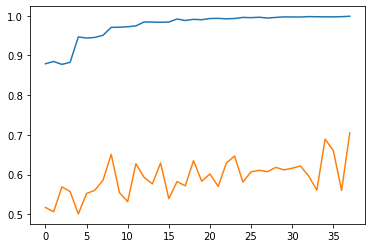

In [47]:
x_vals = [x for x in range(len(trains_rf))]
plt.plot(x_vals,trains_rf)
plt.plot(x_vals,tests_rf)
print("Training Data Max Score and Iteration Number: ")
print(max(trains_rf),trains_rf.index(max(trains_rf))+1) 
print("Testing Data Max Score and Iteration Number: ")
print(max(tests_rf),tests_rf.index(max(tests_rf))+1) 

# Result Comparision
Unscaled Logistic Regression: \
Best Scores during parameter tuning gave .704 for training and .58 for testing data. \
\
Unscaled Random Forest:\
Best Scores during parameter tuning gave .998 for training and .676 for testing data.\
\
Scaled Logistic Regression:\
Best Scores during parameter tuning gave .71 for training and .72 for testing data.\
\
Scaled Random Forest:\
Best Scores during parameter tuning gave .998 for training and .704 for testing data. Using Random CV recieved a score of .65, however this can change as it is a random  sample of all possible parameter selections. 

Logistic regression performed as expected, having recieved scores higher than that of the random forest before and after scaling. Afer scaling there was a drastic improvement in model performance in the logistic regression models, whereas the random forest models remained relatively the same. Even though logistic regression received significantly worse scores on the training data, it performed better on the testing data. The random forest model on the otherhand shows evidence of overfitting, with some parameter combinations yeilding scores of 1.0. As a result the testing scores were worse, but not significantly worse than those of logistic regression. 
